In [65]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeRegressor
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import tree
df = pd.read_csv("forestfires.csv") 

[Text(167.4, 181.2, 'X[6] <= 26.05\nmse = 2092.758\nsamples = 387\nvalue = 10.362'),
 Text(83.7, 108.72, 'X[5] <= 8.65\nmse = 617.534\nsamples = 348\nvalue = 7.669'),
 Text(41.85, 36.23999999999998, 'mse = 965.514\nsamples = 201\nvalue = 9.753'),
 Text(125.55000000000001, 36.23999999999998, 'mse = 127.671\nsamples = 147\nvalue = 4.82'),
 Text(251.10000000000002, 108.72, 'X[3] <= 220.05\nmse = 14614.174\nsamples = 39\nvalue = 34.391'),
 Text(209.25, 36.23999999999998, 'mse = 1369.812\nsamples = 36\nvalue = 16.527'),
 Text(292.95, 36.23999999999998, 'mse = 123763.075\nsamples = 3\nvalue = 248.76')]

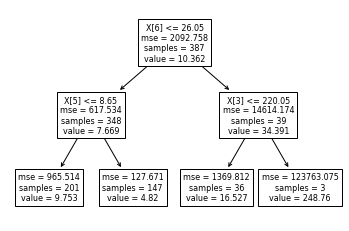

In [85]:
df.head()
X = df[df.columns[0:12]]
X = X._get_numeric_data()
y = df[df.columns[12:13]]

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0) 

dtReg = DecisionTreeRegressor(max_depth=2)
dtReg.fit(X_train, y_train)

y_pred = dtReg.predict(X_test)

tree.plot_tree(dtReg)


In [86]:
from sklearn import metrics
metrics.mean_squared_error(y_test, y_pred)

10798.166247342235